# Data Wrangling and Analyze Data Project

### Import Libraries

In [11]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer
from datetime import datetime

### Gathering Data

In [12]:
# Read csv file
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
# Download image_predictions tsv file 
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
# Read tsv file  
image_predictions = pd.read_csv('image_predictions.tsv', delimiter='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions 
consumer_key = '' 
consumer_secret = '' 
access_token = ''
access_secret = '' 
auth = OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True) 

In [ ]:
tweet_ids = twitter_archive.tweet_id.values 
len(tweet_ids) 
count = 0 
fails_dict = {} 
start = timer() 
# Save each tweet's returned JSON as a new line in a .txt file 
with open('tweet-json.txt', 'w') as outfile: 
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit 
    for tweet_id in tweet_ids: 
        count += 1 
        print(str(count) + ": " + str(tweet_id)) 
        try: 
            tweet = api.get_status(tweet_id, tweet_mode='extended') 
            print("Success") 
            json.dump(tweet._json, outfile) 
            outfile.write('\n') 
        except tweepy.TweepError as e: 
                print("Fail") 
                fails_dict[tweet_id] = e 
                pass 
end = timer() 
print(end - start) 
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [15]:
# Converting JSON data and read it line by line to create dataframe
tweets_list =[]
with open('tweet-json.txt', "r") as json_file:
    for row in json_file:
        try:
            tweet = json.loads(row)
            tweets_list.append(tweet)
        except:
            continue

# Create tweet_info DataFrame
# Add selected variables to tweet_info DataFrame
tweet_info = pd.DataFrame(tweets_list, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing data

Tidiness issues are structural issues, specifically: each variable must be a column, each observation must be a row, and each type of observational unit must be a table.
The Drug A, Drug B, and Drug C columns should form one 'Drug' column, since this is one variable.

In [16]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
twitter_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1740,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None


In [19]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# creat new coloumn called rating
twitter_archive['Rating']=twitter_archive['rating_numerator'] / twitter_archive['rating_denominator']
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


In [21]:
twitter_archive['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [22]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False
1491,782747134529531904,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True
357,672609152938721280,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,1,microwave,0.981946,False,rotisserie,0.007472,False,television,0.005881,False
1343,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,Labrador_retriever,0.778546,True,bathing_cap,0.154254,False,golden_retriever,0.024972,True
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False


In [25]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Quality Issues:

#### 1) 'twitter_archive' table

-tweet_id is integer not string

-'text' column which contain value &amp' instead of '&'

-'source' column has long value

-'timestamp' column string not datetime  

-'name' column  contain lower case and incorrect name

-remove retweets column .

-Empty values in:
in_reply_to_status_id,in_reply_to_user_id

-Empty  value in :
retweeted_status_id,retweeted_status_user_id

-Tweets which were without images

-Tweets without rating

#### 2)'image_predictions' table

-Remove (-) from p1,p2,p3 columns to be more readable.

### Tidiness Issue:

#### 1) 'twitter_archive' table

-'doggo','floofer','pupper','puppo' columns combine them in one column

#### 2) 'tweet_info' table


-Rename 'id' coloumn to 'tweet_id' 

#### 3) All tables

join all three tables through tweet_id

### Cleaning Data

In [26]:
#create copy of all tables
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

#### 1) 'twitter_archive' table

#### Define

Change type of tweet_id from integer to string

#### Code

In [27]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].apply(str)

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
Rating                        2

#### Define

Replace &amp' with '&' in text column as it used usually only in HTML

#### Code

In [29]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace("&amp","&")

### Test

In [30]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Rating


#### Define

Change the value of Source to me more readable

In [31]:
twitter_archive_clean['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

#### Code

In [32]:
source1=[['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',"Twitter for iPhone"],
['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',"Twitter Web Client"],
['<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',"Vine - Make a Scene"],
['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',"TweetDeck"]]
for link,value in source1:
    twitter_archive_clean['source']=twitter_archive_clean['source'].str.replace(link,value)       

#### Test

In [33]:
twitter_archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Define

Change the type of 'timestamp' coloumn from string to datetime

#### Code

In [34]:
twitter_archive_clean['timestamp'] =  pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
Rating                 

#### Define

Change the value of 'name' which has incorrect name.

#### Code

In [37]:
twitter_archive_clean['name'].replace('None', np.nan, inplace=True)
twitter_archive_clean['name'].replace('o', np.nan, inplace=True)
twitter_archive_clean['name'].replace('a', np.nan, inplace=True)
twitter_archive_clean['name'].replace('an', np.nan, inplace=True)
twitter_archive_clean['name'].replace('the', np.nan, inplace=True)
twitter_archive_clean['name'].replace('my', np.nan, inplace=True)

#### Test

In [38]:
twitter_archive_clean['name'].sample(10)

711     Frankie
1859     Reggie
857         NaN
274         NaN
1567      Louis
2013        NaN
1240      Olive
199         NaN
0       Phineas
1841        NaN
Name: name, dtype: object

#### Define

chnage the name from lower case to upper case

#### Code

In [39]:
Upper_name=twitter_archive_clean['name'].str.upper()

### Test

In [40]:
Upper_name.head(3)

0    PHINEAS
1      TILLY
2     ARCHIE
Name: name, dtype: object

### Define

Remove retweet coloum

### Code

In [41]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

### Test

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1425 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
Rating                       

#### Define

Drop unnessary coloumn

#### Code

In [43]:
retweet_coloumn = ["in_reply_to_user_id","in_reply_to_status_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"]
twitter_archive_clean.drop(retweet_coloumn, axis=1, inplace=True)

#### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1425 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
Rating                2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 237.9+ KB


#### Define

-Remove tweet which hass no image

#### Code

In [45]:
twitter_archive_clean = twitter_archive_clean.dropna(axis=0 ,subset=["expanded_urls"])

#### Test

In [46]:
sum(twitter_archive_clean['expanded_urls'].isnull())

0

#### Define

-Remove tweet which in 0 rating

#### Code

In [47]:
twitter_archive_clean['Rating'].replace(0, np.nan, inplace=True)

In [48]:
twitter_archive_clean = twitter_archive_clean.dropna(axis=0 ,subset=["Rating"])

#### Test

In [49]:
sum(twitter_archive_clean['Rating']==0)

0

#### Define

Create new variable which contain stage of dogs and drop stage columns.

#### Code

In [50]:
# convert the Non to Nan
twitter_archive_clean['doggo'].replace('None', np.nan, inplace=True)
twitter_archive_clean['floofer'].replace('None', np.nan, inplace=True)
twitter_archive_clean['pupper'].replace('None', np.nan, inplace=True)
twitter_archive_clean['puppo'].replace('None', np.nan, inplace=True)

In [51]:
# define index of doggo
twitter_archive_clean.columns.get_loc('doggo')

8

In [52]:
# define index of puppo
twitter_archive_clean.columns.get_loc('puppo')

11

In [53]:
twitter_archive_clean['stage']= twitter_archive_clean[twitter_archive_clean.columns[8:12]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [54]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [55]:
twitter_archive_clean['stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

#### 2) 'image_predictions_clean' table

#### Define

-Remove (_) and (-) from p1,p2,p3 coloumns 

#### Code

In [56]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('-', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('-', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('-', ' ')

#### Test

In [57]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1849,839990271299457024,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,Staffordshire bullterrier,0.604938,True,American Staffordshire terrier,0.311540,True,Boston bull,0.037159,True
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit crab,0.528761,False,snail,0.185644,False,shower curtain,0.066361,False
833,693942351086120961,https://pbs.twimg.com/media/CaFg41YWkAAdOjy.jpg,1,groenendael,0.550796,True,Norwegian elkhound,0.154770,True,schipperke,0.080802,True
200,669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador retriever,0.103792,True
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False


#### Define

change the type of tweet_is from int to string

#### Code

In [58]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].apply(str)

#### Test

In [59]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 3)'tweet_info_clean'table

#### Define

change the name from id to tweet_id to be matched with other tables.

#### Code

In [60]:
tweet_info_clean=tweet_info_clean.rename(columns = {'id':'tweet_id'})

#### Test

In [61]:
tweet_info_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


#### Define

change type of tweet_id from int to string

#### Code

In [62]:
tweet_info_clean['tweet_id'] = tweet_info_clean['tweet_id'].apply(str)

#### Test

In [63]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### All Tables

#### Define

merg all three tables through tweter_id

#### Code

In [64]:
df_clean_merg = pd.merge(twitter_archive_clean, image_predictions_clean , on='tweet_id', how='inner')
df_master = pd.merge(df_clean_merg, tweet_info_clean, on='tweet_id', how='inner' )                                       

#### Test

In [65]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,,...,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,9774,41048


### Saving Data

In [67]:
df_master.to_csv('df_master.csv', index= False)

### Analyzing Data

In [68]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,,...,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,9774,41048


In [69]:
df_master.stage.value_counts()

                 1686
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

The most value of dog stage is pupper while the lowest value is for doggo,puppo and doggo,floofer  .

In [70]:
df_master.source.value_counts()

Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

The highest sours is iPhone while the lowest sours is TweetDeck 

### Visulaization

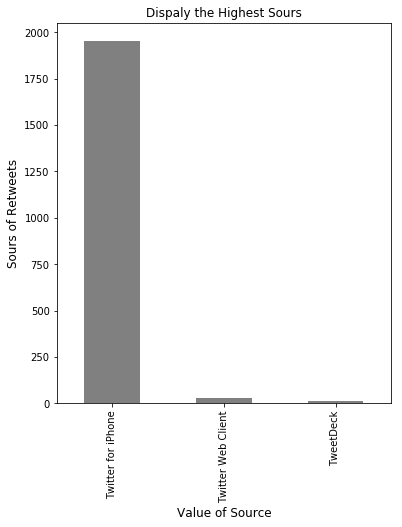

In [72]:
ax = df_master.source.value_counts().plot(kind='bar', figsize=(6,7),
                                        color="gray");
ax.set_title("Dispaly the Highest Sours", fontsize=12)
ax.set_ylabel("Sours of Retweets", fontsize=12);
ax.set_xlabel("Value of Source", fontsize=12);

The highest sours is iPhone while the lowest sours is TweetDeck 

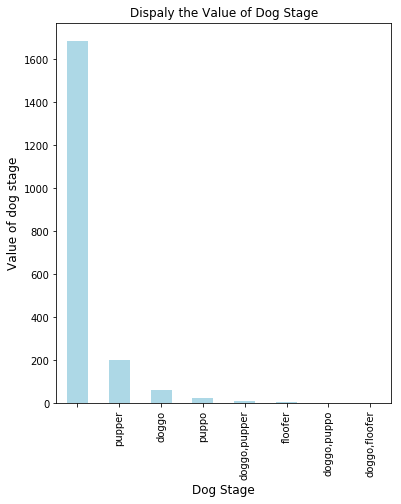

In [73]:
ax = stage_value=df_master.stage.value_counts().plot(kind='bar', figsize=(6,7),
                                        color="lightblue")
ax.set_title("Dispaly the Value of Dog Stage", fontsize=12)
ax.set_ylabel("Value of dog stage", fontsize=12);
ax.set_xlabel("Dog Stage", fontsize=12);

The most value of dog stage is pupper while the lowest value is for doggo,puppo and doggo,floofer .

In [74]:
#the stage the got maximum of favorite_count'
performance = df_master.groupby('stage')['favorite_count'].max()
performance

stage
                 107956
doggo            131075
doggo,floofer     17169
doggo,pupper      44619
doggo,puppo       47844
floofer           33345
pupper           106827
puppo            132810
Name: favorite_count, dtype: int64

We can see, puppo got the maximum with 132810 

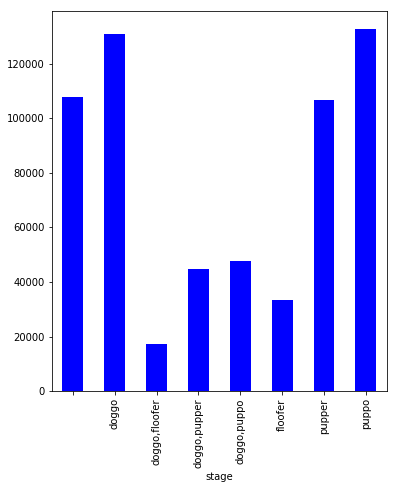

In [77]:
performance = df_master.groupby('stage')['favorite_count'].max().plot(kind='bar', figsize=(6,7),
                                        color="blue")

We can see, puppo got the maximum .